In [1]:
using Revise, Sqra, Plots
Plots.gr(fmt=:png)

┌ Info: Precompiling Sqra [561b40b7-a0ab-4084-b14c-be45599a2ca9]
└ @ Base loading.jl:1317


In [ ]:
sim, dis, com, err = Sqra.with_perma(true, true) do
	#Sqra.batch(Simulation(nsteps=10_000_000), seeds=1:1, levels=vcat(3:10, 20))

	Sqra.batch(Simulation(nsteps=100_000_000), seeds=1:1, levels=vcat(3:20))
end;

In [ ]:
plotinds = [1,3,6,10, 18,19,20]
#plotinds = [1]
for i in plotinds 
	plot(dis[i], select=rand(1:size(dis[i].picks,2),1000), com=com[i],normalize=true) |> display
end

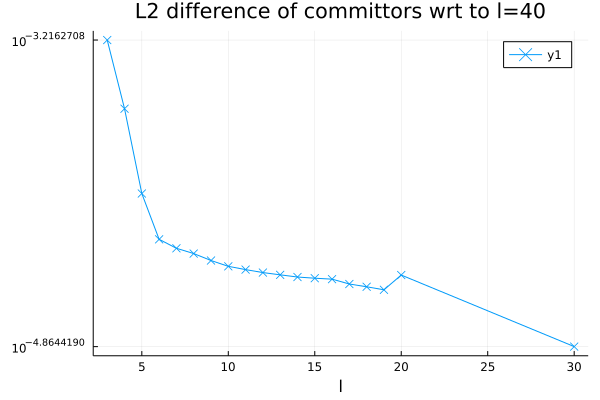

In [ ]:
plot([d.ncells for d in dis[1:end-1]], err[1:end-1], marker=:x)
yaxis!(:log)
yticks!(Float64.(err[[1, end-1]]))
title!("L2 difference of committors wrt to l=$(dis[end].ncells)")
xlabel!("l")